In [170]:
import cv2
import numpy as np
import os

from moviepy.editor import VideoFileClip
from scipy.misc import imresize

import imagehash

from matplotlib import pyplot
from matplotlib.pyplot import imshow, figure 

import IPython.display as display
from PIL import Image
from collections import defaultdict

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [32, 32]

In [176]:
class spriteboard:
    def __init__(self):
        HASHES = [
            # Unknown
            [],
            # Player
            ['ffc34242426666c3', '7c7e3c183c3c1838', '787e3c187c3e3c7c', '78fc783078783038', '78fc783078f8787c', '18ff3c3c7edb2424', '18ff3c3c7efc6c0c', '18ff3c3c7eff3630', '00ff3c187edb2424', '7eff3c187eff6c0c', '7eff3c187e3f3630'],
            # Civilian
            ['383c3e3c3c7e1838', '383c1e1e7efc6cec', '383c1e3e7e3f6c6c', '1c3c7c3c3c7e181c', '1c3c78787efe3636', '1c3c783c7e3f3636', '3c7e7edbdafc2424', '3c7e7edbfe7c2430', '3c7e7edbfcfc240c', '3c7e7edb5b3f2424', '3c7e7edb3f3f2430',
             '3c7e7edb7b3e240c', '1818181818383818', '1818181c3c3e3e68', '1818181c3cfcf878', '3838383838383818', '30303870783e3e3c', '3038707878f8fc2c', '3030fcfcb4362e68', '3030fcfcb4362e20', '3030fcfcb6366a18', '0c0c3f3f2d6c7416',
             '0c0c3f3f6d6c5618', '0c0c3f3f2d6c7404', '3c7c3c3c3c3c1838', '3c3c3c3c7e6626e6', '3c3c3c3c7f6626e7', '3c3e3c3c3c3c181c', '3c3c3c3cfe6664e6', '3c3c3c3c7e4e64e6', '3c3c3c7eff3c2466', '3c3c3c7e7f3e2720', '3c3c3c7efe7ce404'],
            # Grunt
            ['183c3cffbd183c66', '183c3cffbd383c0c', '183c3cffbd1c3c30'],
            # Hulk
            ['183c3c3c3c181800', '18183c7e7c3c6600', '18183c3efe3c6600', '1818ffffffbd2400', '1818ffffff7f0c0c', '1818fffffffe3030', '10387c7c7c303000', '10307c7c7e78c600', '10307c7efc78c400'],
            # Sphereoid
            ['0000001818000000', '0000001818180000', '0000183c3c180000', '0000183c3c3c0000', '00003c66667e1800', '00187e6666663c00', '183c4242c3421818', '181800c3c3000018'],
            # Enforcer
            ['00187e187eff3c3c', '000000183c181800', '0000183c3c3c1800', '0000181c1c1c1808', '00183c3c7e7e1818', '001c3e3e3e3e3c1c'],
            # Brain
            ['3c7e7e7e7c301030', '3c7e7e7e7c307008', '3c7e7e7e7c307028', '387cfefc3c1c0808', '387cfefc3c1c1c04', '107effff7e183c18', '107effff7e183c10', '107effff7e183c08', '187effff7e183c10', '187effff7e183c08'],
            # Tank
            ['183c18667e7e7e42', '183c187e7e7e7e42', '003c187a7e7e7e42', '003c187e7e7e7e42'],
            # Electrode
            ['005a3c3cff3c7e5a', '00183c3c7e3c3c18', '000018183c180000', '005a7e7ee77e7e5a', '00183c3c7e3c1818', '0000001c3c180000', '007e7e7e7e7e7e7e', '0000183c3c3c0000', '0003070f1f3f7fff', '000002060e1e3e3e', '000000040e1c1c00',
             '003c3c3c3c3c3c3c', '0018181818181818', '00183c7eff7e3c18', '00183c3c7e3c1800', '00ff8199915b82ff', '0000ffdbd1dfff7e', '0000007e7e3c0000', '007e7e66c3667e7e', '00183c3c663c3c00', '0000183c3c3c1800', '7ec1bda5b5857d03',
             '00003c24fcf4fc00', '00007e2e3c300000'],
            # Quark
            ['0000001818180000', '0000183c3c3c0000', '00003c3c3c3c0000', '003c7e7e7e7e7e00', '007e667c5a247600', '005a2400812466db', '99426600812466db', '1800008181000018', '0000000000000000'],
            # Bullet
            ['18181818ff181818', '0002663c183c6666', '0040663c183c6666'],
        ]
                
        self.spriteHashMap = []

        for sprite_classes in HASHES:
            hashes = []
            for hashStr in sprite_classes:
                hashes.append(imagehash.hex_to_hash(hashStr))
            self.spriteHashMap.append(hashes)


    def match(self, image, threshold = 10):
        img = cv2.resize(image, (20, 20))
        sHash = imagehash.average_hash(Image.fromarray(image))

        bestScore = 999
        bestClass = 0
        for i, classHashes in enumerate(self.spriteHashMap):
            for spriteHash in classHashes:
                score = sHash - spriteHash
                if score < threshold and score < bestScore:
                    bestScore = score
                    bestClass = i

        return bestClass, sHash

    @staticmethod  
    def crop(img, x, y, w, h):
        return img[y:y+h, x:x+w]
    
    @staticmethod
    def saveImage(imageType, classStr, image):
        sHash = imagehash.average_hash(Image.fromarray(image))
        filename = '/home/strider/Code/robotron/scratch/{}/{}/{}.jpg'.format(imageType, classStr, sHash)
        path = os.path.dirname(filename)
        if not os.path.exists(path):
            os.makedirs(path, exist_ok=True)
            
        if not os.path.isfile(filename):
            cv2.imwrite(filename, image)
        

    @staticmethod
    def class2string(c):
        return [
            "UNKNOWN",
            "PLAYER",
            "CIVILIAN",
            "GRUNT",
            "HULK",
            "SPHEROID",
            "ENFORCER",
            "BRAIN",
            "TANK",
            "QUARK",
            "ELECTRODE",
            "BULLET",
            "IGNORE"
        ][c]
    
    def process(self, frame):
        ds = imresize(frame, size=(720, 1280), interp='nearest')
        crop = ds[116:608, 309:974]
        
        tagged = crop.copy()
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 8, 255, cv2.THRESH_BINARY)
        blur = cv2.GaussianBlur(thresh, (3, 3), 0)
        contours, _ = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        
        spz = {
            'color': defaultdict(list),
            'gray': defaultdict(list),
            'resized': defaultdict(list)
        }
                
        for contour in enumerate(contours):
            rect = cv2.boundingRect(contour[1])
            (x, y, w, h) = rect

            # Since enemies explode into horizontal/vertical bands, ignore small bands
            if h <= 10 or w <= 10:
                continue
                
            cv2.rectangle(tagged, (x,y), (x+w,y+h), (255, 255, 255), 2)
            
            bestClass, resizeHash = self.match(self.crop(thresh, *rect))
            grayHash = imagehash.average_hash(Image.fromarray(self.crop(gray, *rect)))

            classStr = self.class2string(bestClass)
#             self.saveImage('color', classStr, self.crop(crop, *rect))
#             self.saveImage('gray', classStr, self.crop(thresh, *rect))
#             self.saveImage('resized', classStr, cv2.resize(self.crop(thresh, *rect), (20, 20)))
                
            spz['color'][classStr].append(self.crop(crop, *rect))
            spz['gray'][classStr].append(self.crop(thresh, *rect))
            spz['resized'][classStr].append(cv2.resize(self.crop(thresh, *rect), (20, 20)))
            
            
        return spz, tagged
            

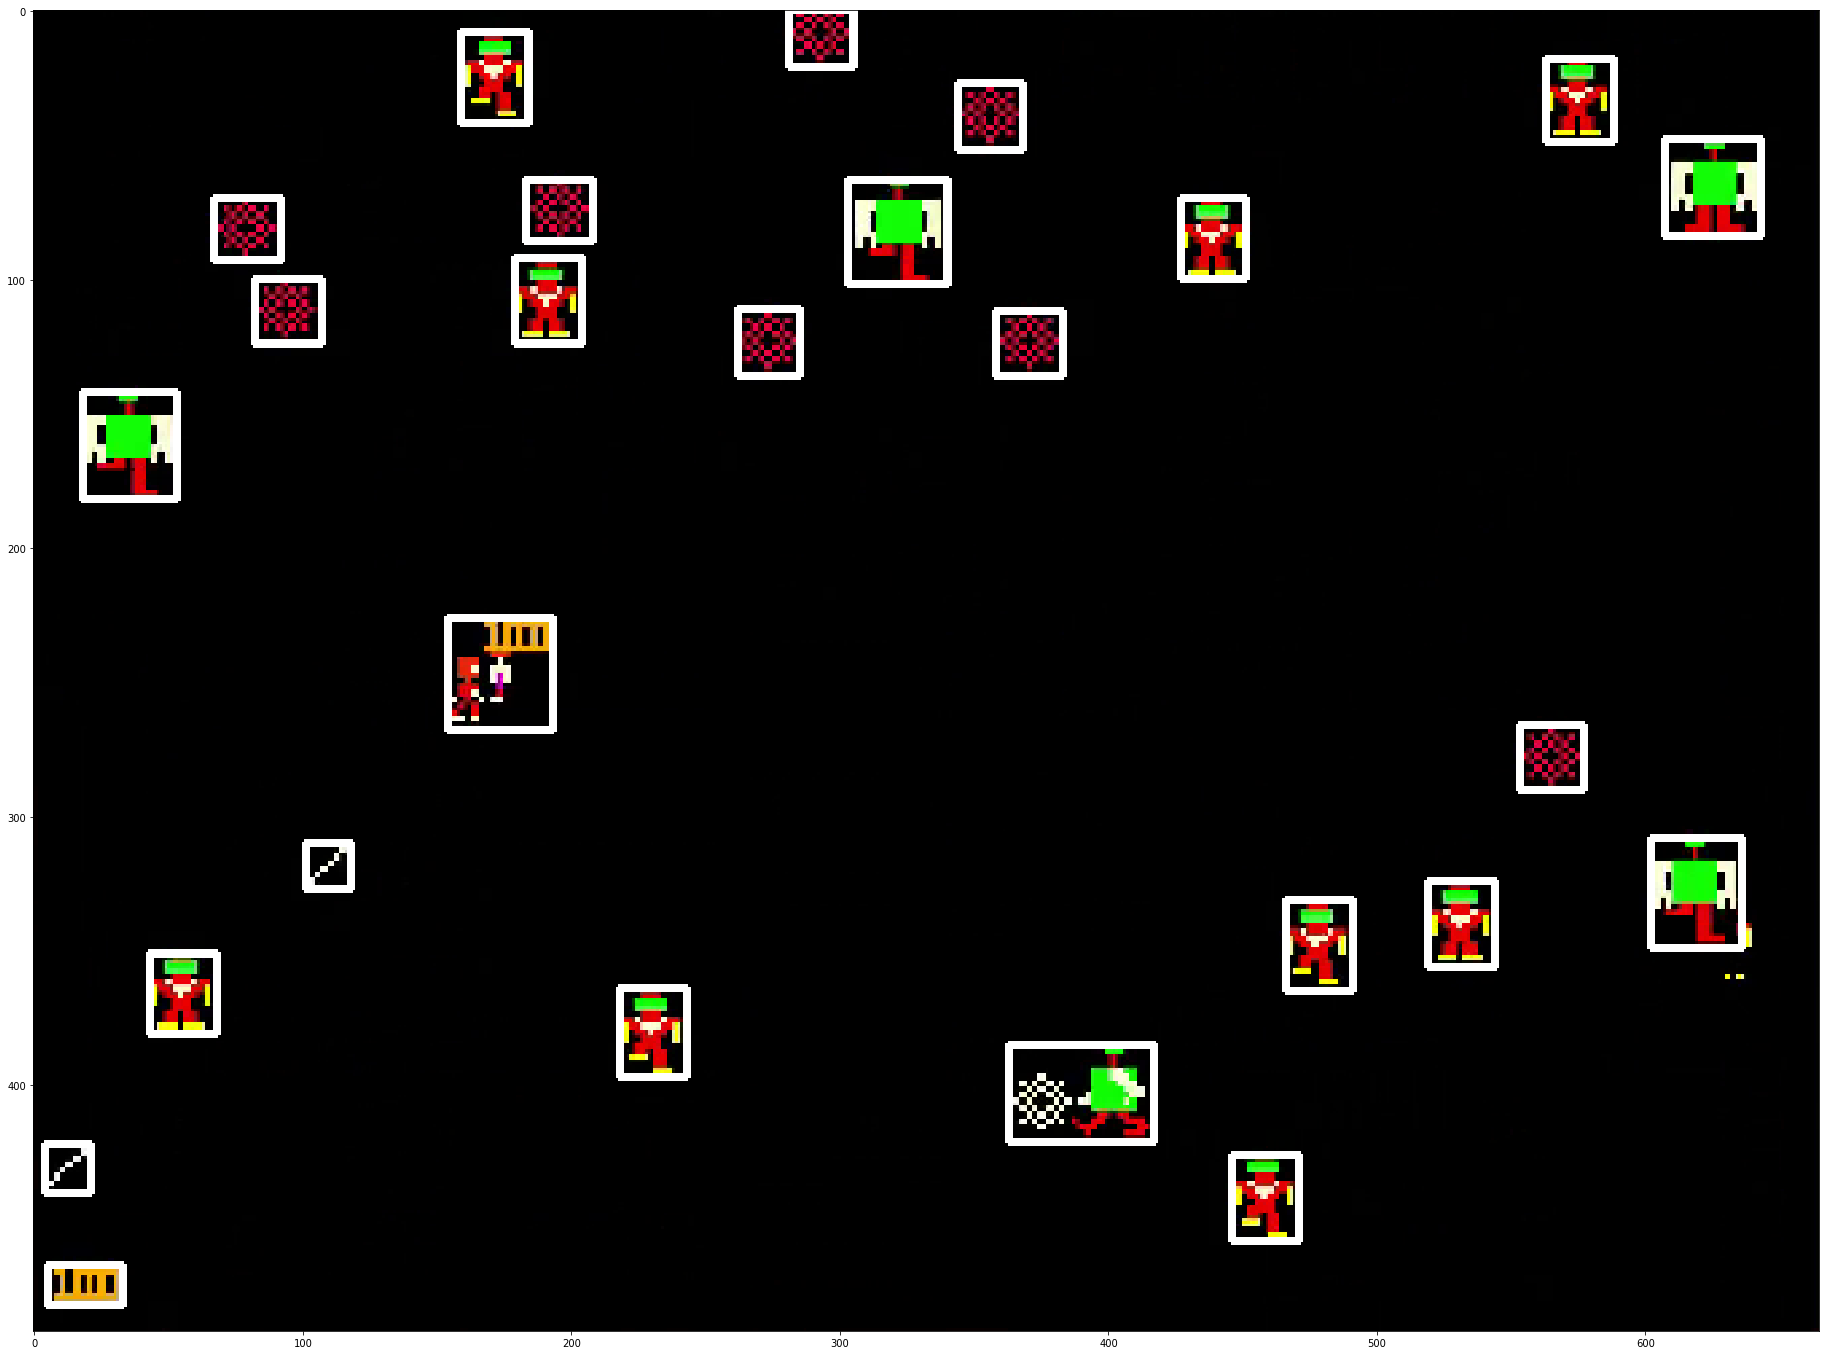

In [177]:
tagger = spriteboard()
clip = VideoFileClip('/home/strider/Code/robotron/resources/video/robotron-1.mp4')
# subclip = clip.subclip(0, 10)
# tagged = subclip.fl_image(tagger.markEnemies)
# tagged.ipython_display(width=400, audio=False)

frame = clip.get_frame(53)
results, tagged = tagger.process(frame)
imshow(tagged)


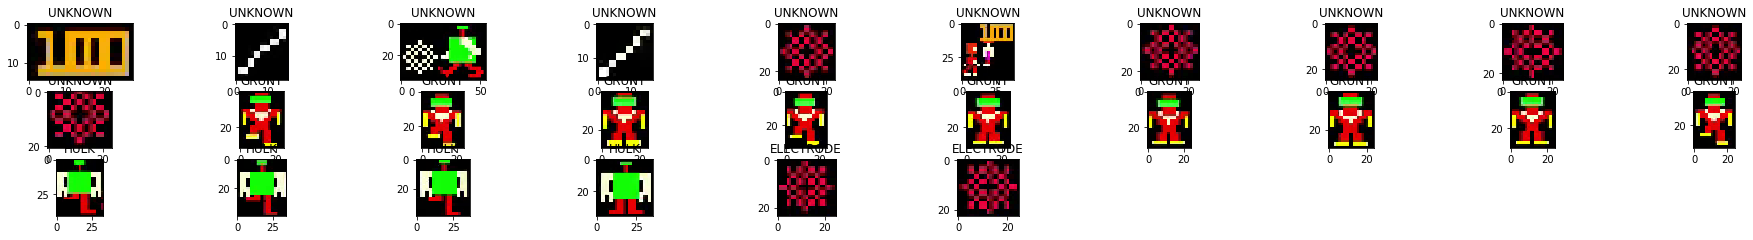

In [178]:
iType = "color"

c = 0
for iTypes in result[iType]:
    for sprite in sTypes:
        c += 1

fig=pyplot.figure(figsize=(32, 90))
i = 0
r = 10
for sTypes in results[iType]:
    for sprite in results[iType][sTypes]:
        i += 1
        subplot = fig.add_subplot(c, r, i)
        pyplot.imshow(sprite)
        subplot.set_title(sTypes)
            

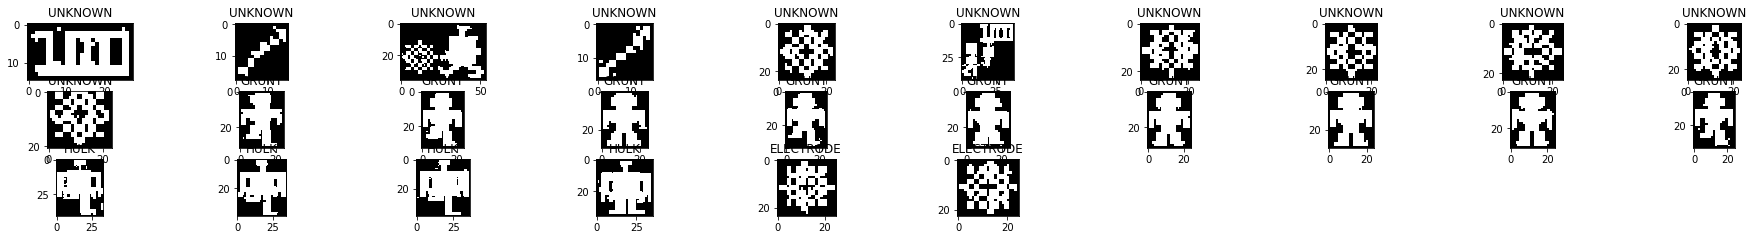

In [179]:
iType = "gray"

c = 0
for iTypes in result[iType]:
    for sprite in sTypes:
        c += 1

fig=pyplot.figure(figsize=(32, 90))
i = 0
r = 10
for sTypes in results[iType]:
    for sprite in results[iType][sTypes]:
        i += 1
        subplot = fig.add_subplot(c, r, i)
        pyplot.imshow(sprite, cmap="gray")
        subplot.set_title(sTypes)

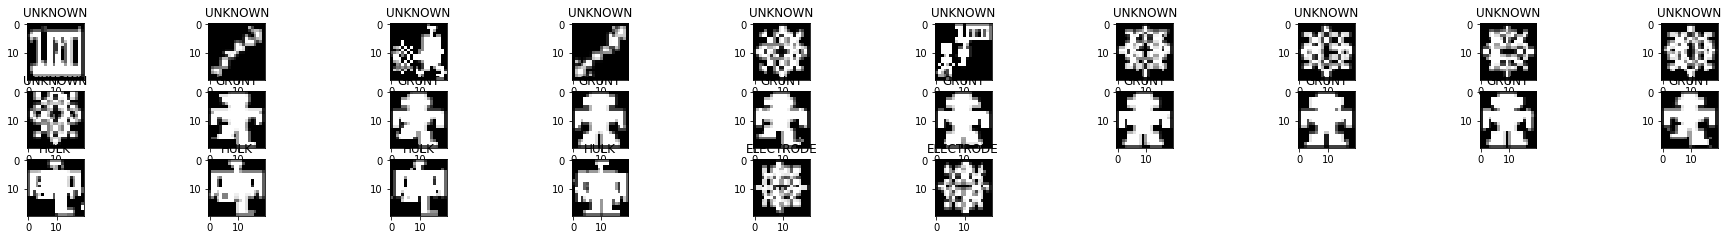

In [180]:
iType = "resized"

c = 0
for iTypes in result[iType]:
    for sprite in sTypes:
        c += 1

fig=pyplot.figure(figsize=(32, 90))
i = 0
r = 10
for sTypes in results[iType]:
    for sprite in results[iType][sTypes]:
        i += 1
        subplot = fig.add_subplot(c, r, i)
        pyplot.imshow(sprite, cmap="gray")
        subplot.set_title(sTypes)